# Utilizes AI-based network mapping and real-time monitoring to guide users to strong network zones for seamless Rakuten service usage.


### Since the dataset for this model aren't available  publicly so i created a hypothetical datastet and worked on it
### Hypothetical Dataset: `synthetic_telecom_data.csv`
1. **Timestamped Data**: 
    - **Date and Time**: Generate a continuous series of timestamps. For instance, every minute for a year.

2. **Traffic Volume**:
    - **Data Rate**: Use a random function (with some constraints) to emulate network traffic volume. Consider adding daily or weekly patterns (e.g., higher traffic during evenings or weekends).
    - **Packet Rate**: Similarly, generate random values, ensuring they're in sync with the Data Rate (higher data rate should correlate with higher packet rates).

3. **Traffic Type**:
    - **Voice**: Randomly generate voice traffic volumes; perhaps show dips during non-peak hours.
    - **Text**: Random numbers for text traffic, possibly showing spikes during certain hours.
    - **Data**: Categorized data for different services. For instance, video streaming might be higher during evenings.

4. **Network Metrics**:
    - **Latency**: Generate values with slight fluctuations, but introduce occasional spikes to represent network congestion.
    - **Jitter**: Randomly generated values around a baseline, with occasional peaks.
    - **Packet Loss Rate**: Mostly low values with occasional spikes.
    - **Error Rates**: Introduce random errors sporadically.

5. **Infrastructure Information**:
    - **Cell Tower Data**: Choose a fixed number of towers and distribute the generated traffic among them.
    - **Network Topology**: This can be a static part of your dataset, indicating your hypothetical infrastructure.
    - **Hardware Status**: Generate random 'uptime' periods, occasionally introducing 'downtime'.

6. **Signal Information**:
    - **Signal Strength**: Fluctuate around a strong signal but introduce occasional weak signals.
    - **Noise Levels**: Randomly generate noise levels, higher noise could correlate with lower signal strength.

7. **User Data**:
    - **Active Users**: Fluctuate this value to show user activity, e.g., more users during the day and fewer at night.
    - **User Behavior**: Generate patterns, like more streaming during certain hours.

8. **External Factors**:
    - **Events**: Introduce occasional 'event days' with higher traffic.
    - **Weather Data**: Randomly assign weather conditions, and perhaps on 'stormy' days, show some deterioration in signal quality.

9. **Historical Incident Data**:
    - Randomly introduce past incidents, noting the duration and cause.

10. **Service Level Agreements (SLAs)**:
    - This could be a static part of your dataset, indicating your hypothetical SLA standards.
    

In [2]:
import pandas as pd
import numpy as np

date_rng = pd.date_range(start='2023-08-21', end='2023-08-22',  freq='T')

df = pd.DataFrame(date_rng, columns=['timestamp'])

df['data_rate'] = np.random.choice(np.arange(10, 1000), df.shape[0])
df['packet_rate'] = df['data_rate'].apply(lambda x: x * np.random.uniform(0.8, 1.2))

df['voice_traffic'] = np.random.choice(np.arange(1, 100), df.shape[0])
df['text_traffic'] = np.random.choice(np.arange(1, 100), df.shape[0])
df['data_streaming'] = df['data_rate'] - df['voice_traffic'] - df['text_traffic']

df['latency'] = np.random.choice(np.arange(10, 100), df.shape[0])
df['jitter'] = df['latency'].apply(lambda x: x * np.random.uniform(0, 0.1))
df['packet_loss_rate'] = np.random.uniform(0, 5, df.shape[0])  
df['error_rate'] = np.random.uniform(0, 1, df.shape[0])  

df['signal_strength'] = np.random.choice(np.arange(-90, -30), df.shape[0])  
df['noise_level'] = np.random.choice(np.arange(-120, -80), df.shape[0])  


df['active_users'] = np.random.choice(np.arange(1000, 5000), df.shape[0])
df['data_streaming_users'] = df['active_users'] * np.random.uniform(0.5, 0.7, df.shape[0])

df.to_csv('synthetic_telecom_data.csv', index=False)


### Time Series Forecasting with LSTM:

In [11]:
!pip install -U scikit-learn

In [97]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming 'data_rate' is what we're forecasting.
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

df = pd.read_csv('synthetic_telecom_data.csv')
data_rate = df['data_rate'].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_rate = scaler.fit_transform(data_rate)

WINDOW_SIZE = 10  # an arbitrary number; you can adjust based on your data's seasonality

X, y = create_sequences(data_rate, WINDOW_SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
history = lstm_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
lstm_model.save('map_model.h5')


Epoch 1/30
36/36 [==============================] - 4s 65ms/step - loss: 0.2467 - val_loss: 0.1016
Epoch 2/30
36/36 [==============================] - 2s 56ms/step - loss: 0.0903 - val_loss: 0.0853
Epoch 3/30
36/36 [==============================] - 2s 55ms/step - loss: 0.0872 - val_loss: 0.0840
Epoch 4/30
36/36 [==============================] - 2s 55ms/step - loss: 0.0865 - val_loss: 0.0833
Epoch 5/30
36/36 [==============================] - 2s 53ms/step - loss: 0.0861 - val_loss: 0.0830
Epoch 6/30
36/36 [==============================] - 2s 55ms/step - loss: 0.0863 - val_loss: 0.0834
Epoch 7/30
36/36 [==============================] - 2s 58ms/step - loss: 0.0864 - val_loss: 0.0828
Epoch 8/30
36/36 [==============================] - 2s 57ms/step - loss: 0.0855 - val_loss: 0.0820
Epoch 9/30
36/36 [==============================] - 2s 52ms/step - loss: 0.0851 - val_loss: 0.0818
Epoch 10/30
36/36 [==============================] - 2s 58ms/step - loss: 0.0850 - val_loss: 0.0816
Epoch 11/

In [21]:
print("Available keys in history:", history.history.keys())

Available keys in history: dict_keys(['loss', 'val_loss'])


Train MSE: [0.24670983850955963, 0.09025350213050842, 0.08717123419046402, 0.08652229607105255, 0.08613906800746918, 0.08628769963979721, 0.08641404658555984, 0.08553971350193024, 0.08510401844978333, 0.08497171849012375, 0.08465544134378433, 0.08500853925943375, 0.08487460762262344, 0.08432656526565552, 0.08493439853191376, 0.08465269953012466, 0.0844125747680664, 0.08432856947183609, 0.08446146547794342, 0.084177166223526, 0.08422399312257767, 0.08438087999820709, 0.0842059925198555, 0.08397704362869263, 0.08418122678995132, 0.08392877876758575, 0.0839192345738411, 0.08368520438671112, 0.08374083042144775, 0.08387134224176407]
Validation MSE: [0.10160761326551437, 0.08531289547681808, 0.08399854600429535, 0.08328810334205627, 0.08300137519836426, 0.08337480574846268, 0.08275941014289856, 0.08199328929185867, 0.0817733034491539, 0.08157467842102051, 0.08141674846410751, 0.08190710842609406, 0.08116083592176437, 0.08144264668226242, 0.08107954263687134, 0.081444151699543, 0.08086591213

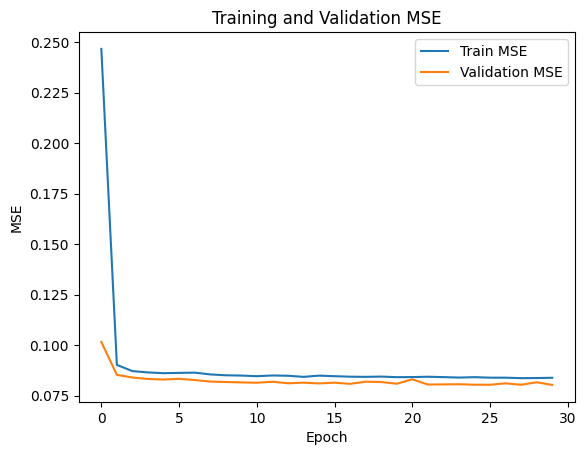

In [98]:
train_mse = history.history['loss']
val_mse = history.history['val_loss']

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)

plt.plot(train_mse, label='Train MSE')
plt.plot(val_mse, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [114]:
import numpy as np

def load_data(file_name):
    return pd.read_csv(file_name)

def preprocess_data(df, columns):
    features = df[columns].values
    scaler = MinMaxScaler()
    features_scaled = scaler.fit_transform(features)
    return features_scaled, scaler

def create_and_train_base_model(X, y):
    base_model = tf.keras.Sequential([
        tf.keras.layers.LSTM(100, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(50, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    base_model.compile(optimizer='adam', loss='mse')
    history = base_model.fit(X, y, epochs=50, batch_size=32)
    
    return base_model, history

# Using the functions:
data_file = 'synthetic_telecom_data.csv'
columns = ['data_rate', 'packet_rate', 'voice_traffic', 'text_traffic', 'data_streaming', 
           'latency', 'jitter', 'packet_loss_rate', 'error_rate', 'signal_strength', 
           'noise_level', 'active_users']

df_large = load_data(data_file)
features_scaled, feature_scaler = preprocess_data(df_large, columns)
X_large, y_large = create_sequences(features_scaled, WINDOW_SIZE)
X_large = X_large.reshape(X_large.shape[0], X_large.shape[1], len(columns))

base_model, base_hist = create_and_train_base_model(X_large, y_large)


Epoch 1/50


## Fine-tuning Phase:

In [113]:
# Assuming that the create_sequences function prepares sequences correctly:
X_train, y_train = create_sequences(df_large['data_rate'].values, WINDOW_SIZE)

X_test, y_test = create_sequences(test_data, WINDOW_SIZE) # If you have separate test data

# Make sure the shapes are consistent:
print(X_train.shape)  # This should print (num_samples, 10, 1) if each sequence is of shape (10, 1)

# Now proceed with transfer learning as you've shown in your code:
for layer in base_model.layers:
    layer.trainable = False

transfer_model = tf.keras.models.Sequential(base_model.layers)
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(30, activation='relu'))
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(15, activation='relu'))
transfer_model.add(tf.keras.layers.Dropout(0.2))
transfer_model.add(tf.keras.layers.Dense(1))

transfer_model.compile(optimizer='adam', loss='mse')
trans_hist = transfer_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
transfer_model.save('map_model2.h5')


NameError: name 'test_data' is not defined

In [106]:
from sklearn.preprocessing import StandardScaler

df_transfer = pd.read_csv('synthetic_telecom_data.csv')

def preprocess_transfer_data(df):
    # Extracting features and target from the dataset
    X = df.drop(columns=['timestamp', 'data_rate'])  # Dropping 'timestamp' as it's not a numeric feature, and 'data_rate' because it's the target
    y = df['data_rate'].values
    
    # Standardizing the feature set
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    return X, y

X_transfer, y_transfer = preprocess_transfer_data(df_transfer)  # You'd need a function to preprocess this new data

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_transfer, y_transfer, test_size=0.2, shuffle=False)

# Reshaping the data to have a third dimension
X_train = X_train[:, :10].reshape(-1, 10, 1)
X_test = X_test[:, :10].reshape(-1, 10, 1)


# Train the transfer model
trans_hist = transfer_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Save the trained transfer model
transfer_model.save('map_model2.h5')

# Predict using the transfer model
predictions = transfer_model.predict(X_test)

# Generate recommendations based on the predictions
# Assuming the predictions are continuous values, and a threshold is used to classify them.
threshold = 0.5  # This is an arbitrary threshold, adjust as necessary
recommendations = ["Strong Zone" if pred >= threshold else "Weak Zone" for pred in predictions]

print(recommendations)


Epoch 1/30
36/36 [==============================] - 3s 52ms/step - loss: 336284.0625 - val_loss: 325720.0000
Epoch 2/30
36/36 [==============================] - 1s 36ms/step - loss: 325247.5938 - val_loss: 308543.6250
Epoch 3/30
36/36 [==============================] - 1s 37ms/step - loss: 301757.4688 - val_loss: 280062.4375
Epoch 4/30
36/36 [==============================] - 1s 35ms/step - loss: 269827.3750 - val_loss: 244478.3125
Epoch 5/30
36/36 [==============================] - 1s 36ms/step - loss: 231847.8125 - val_loss: 205899.4219
Epoch 6/30
36/36 [==============================] - 1s 36ms/step - loss: 195175.0156 - val_loss: 169275.8125
Epoch 7/30
36/36 [==============================] - 1s 35ms/step - loss: 160686.0781 - val_loss: 138078.2500
Epoch 8/30
36/36 [==============================] - 1s 32ms/step - loss: 136534.8125 - val_loss: 114568.9688
Epoch 9/30
36/36 [==============================] - 1s 34ms/step - loss: 120185.9062 - val_loss: 98557.1953
Epoch 10/30
36/36 [=

Available keys in history: dict_keys(['loss'])


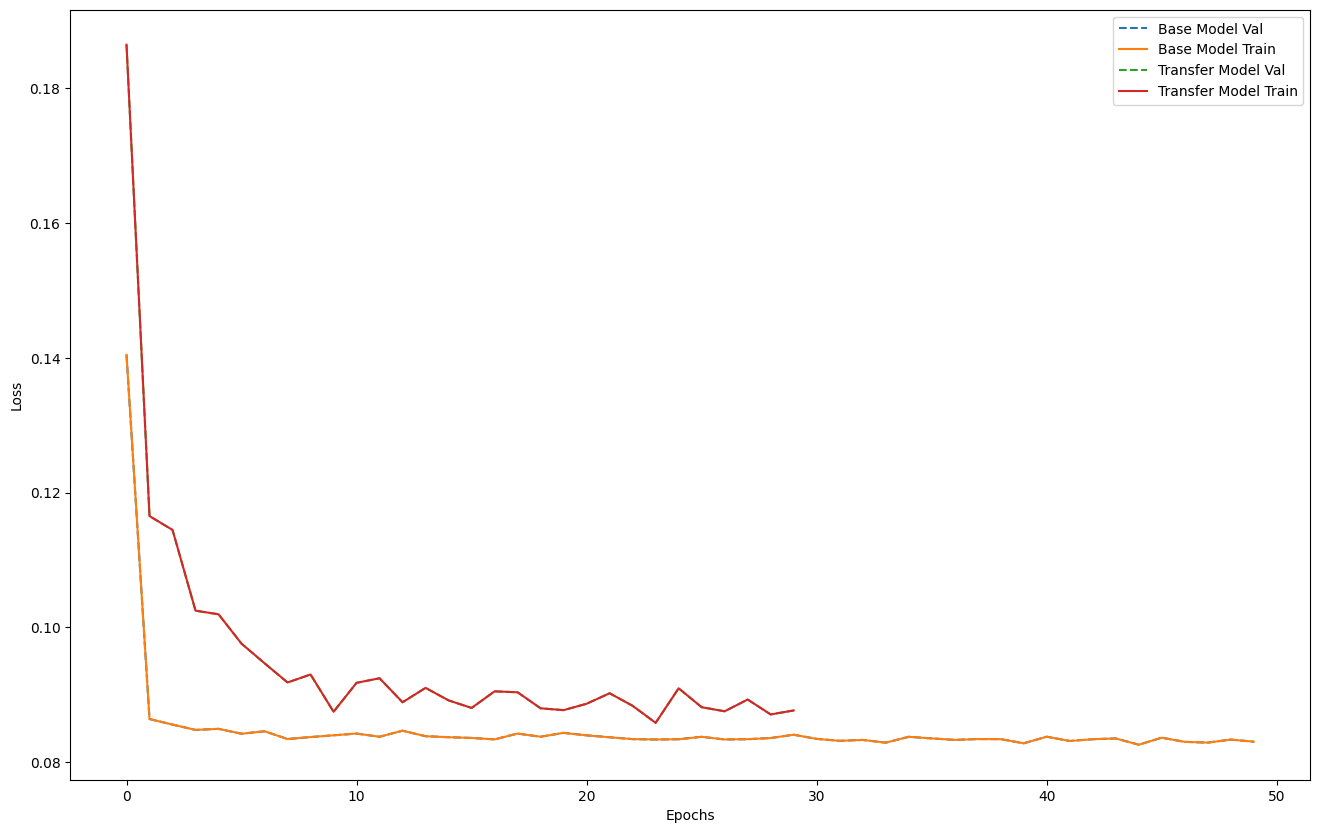

In [103]:
import matplotlib.pyplot as plt

print("Available keys in history:", base_hist.history.keys())

val_loss_key = 'loss'

def plot_loss(histories, key='loss'):
    plt.figure(figsize=(16, 10))
    for name, history in histories:
        plt.plot(history.epoch, history.history['loss'], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

plot_loss([('Base Model', base_hist), ('Transfer Model', trans_hist)], key=val_loss_key)


## AI-Powered Network Maintenance & Outage Predictor:
### Hypothetical Dataset: `hypothetical_telecom_data.csv`

1. **user_id**:
    - **Description**: Unique identifier assigned to each telecom user.
    - **Type**: Integer
    - **Example Value**: 1, 2, 3, ... 1000
    - **Purpose**: Helps in tracking individual users' behavior and monthly statistics.

2. **month_year**:
    - **Description**: Represents the month and year during which the data was collected.
    - **Type**: String
    - **Example Value**: "Jan_2023", "Feb_2023", ...
    - **Purpose**: Helps in tracking and analyzing data on a monthly basis.

3. **app1_data_used** to **app5_data_used**:
    - **Description**: The amount of data (in GB) used by a user on 5 different apps in the respective month. For simplicity, we've named them `app1`, `app2`, etc., but in a real-world scenario, they might be popular apps like YouTube, Netflix, Facebook, etc.
    - **Type**: Float
    - **Example Value**: 4.5, 2.3, ...
    - **Purpose**: To analyze individual app usage patterns, which can be utilized to make data-saving recommendations.

4. **total_data_used**:
    - **Description**: The total amount of data (in GB) used by a user in that month. It's the summation of data used across all apps and other background data usages.
    - **Type**: Float
    - **Example Value**: 20.5, 35.2, ...
    - **Purpose**: Key metric to predict monthly expenses and understand overall data consumption.

5. **monthly_expense**:
    - **Description**: The total amount of money (in a hypothetical currency) the user has been charged for their data and other telecom services in that month.
    - **Type**: Float
    - **Example Value**: 45.2, 60.5, ...
    - **Purpose**: The target variable for our predictive analytics model. Based on previous data usage, this model aims to predict future expenses.


In [59]:
import pandas as pd
import numpy as np

# Generating random data for 1000 users for 12 months
user_ids = np.arange(1, 1001)
month_years = ["Jan_2023", "Feb_2023", "Mar_2023", "Apr_2023", "May_2023", "Jun_2023",
               "Jul_2023", "Aug_2023", "Sep_2023", "Oct_2023", "Nov_2023", "Dec_2023"]

data = []

for user in user_ids:
    for month in month_years:
        total_data_used = np.random.uniform(1, 50)  # Random data usage between 1GB to 50GB
        app_data_used = np.random.uniform(0, total_data_used, 5)  # Random data for 5 apps
        monthly_expense = total_data_used * 2 + np.random.uniform(-10, 10)  # Assuming a basic correlation between data usage and expense with some random noise

        data.append([user, month] + list(app_data_used) + [total_data_used, monthly_expense])

df = pd.DataFrame(data, columns=["user_id", "month_year", "app1_data_used", "app2_data_used", "app3_data_used",
                                 "app4_data_used", "app5_data_used", "total_data_used", "monthly_expense"])
df.to_csv("hypothetical_telecom_data.csv", index=False)
df.head()

,user_id,month_year,app1_data_used,app2_data_used,app3_data_used,app4_data_used,app5_data_used,total_data_used,monthly_expense
0,1,Jan_2023,15.366585,9.809870,16.906179,18.511447,10.580038,26.911152,49.332725
1,1,Feb_2023,5.329622,0.951065,0.757620,5.860499,5.772448,6.881176,20.828896
2,1,Mar_2023,7.129643,14.389523,4.559648,16.187085,15.020490,18.005440,27.062997
3,1,Apr_2023,3.875900,22.163568,5.547568,25.987676,35.886788,37.184052,79.642394
4,1,May_2023,13.934595,42.934257,19.651818,1.656044,38.341455,43.768007,84.503120


In [84]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("hypothetical_telecom_data.csv")

# Using total data usage of the previous month to predict outages or congestion for the next month
X = df[["total_data_used"]].values[:-1]  # Skip last month

threshold = df["monthly_expense"].mean()
y = (df["monthly_expense"].values[1:] > threshold).astype(int)  # Skip first month and binarize based on the threshold

# Scaling
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Using a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training
out_history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

# Print the model summary
model.summary()

# Model evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('outage_model.h5')


Epoch 1/100
525/525 [==============================] - 7s 13ms/step - loss: 0.6945 - accuracy: 0.5013 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 2/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6933 - accuracy: 0.4993 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 3/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6932 - accuracy: 0.5057 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 4/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6934 - accuracy: 0.4935 - val_loss: 0.6933 - val_accuracy: 0.4986
Epoch 5/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6934 - accuracy: 0.4918 - val_loss: 0.6931 - val_accuracy: 0.5014
Epoch 6/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6934 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5014
Epoch 7/100
525/525 [==============================] - 6s 12ms/step - loss: 0.6933 - accuracy: 0.4914 - val_loss: 0.6932 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv("hypothetical_telecom_data.csv")

# Feature Engineering: Adding rolling average as a new feature
rolling_avg = df["total_data_used"].rolling(window=3, min_periods=1).mean()
df["rolling_avg"] = rolling_avg.shift(1)  # Shift by one to use previous month's average

# Assuming we'll use total data usage of the previous month to predict outages or congestion for the next month
X = df[["total_data_used", "rolling_avg"]].values[:-1]  # Skip last month

threshold = df["monthly_expense"].mean()
y = (df["monthly_expense"].values[1:] > threshold).astype(int)  # Skip first month and binarize based on the threshold

# Scaling
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Enhanced Model definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Using a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Implementing Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Increasing epochs and adjusting batch size
out_history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

# Plot training/validation accuracy
import matplotlib.pyplot as plt

train_accuracy = out_history.history['accuracy']
val_accuracy = out_history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [63]:
out_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

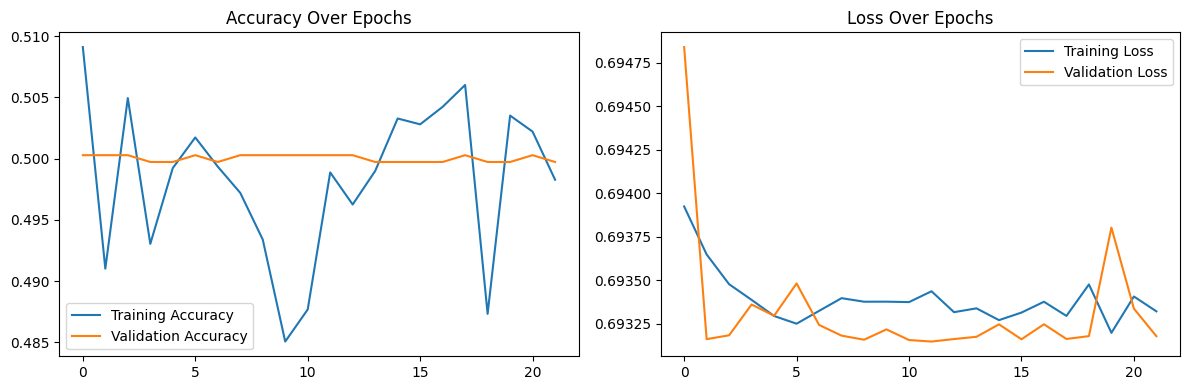

In [64]:

import matplotlib.pyplot as plt

# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(out_history.history['accuracy'], label='Training Accuracy')
plt.plot(out_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(out_history.history['loss'], label='Training Loss')
plt.plot(out_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.tight_layout()
plt.show()

In [68]:
# Assuming you've trained the model already and have test data
test_sample = X_test  # this should be a sequence of time steps from your test set
test_label = y_test[0]  # Taking the first label from y_test for comparison

# Make the prediction
prediction = model.predict(test_sample)

# Convert the prediction to binary class
predicted_class = [1 if p > 0.5 else 0 for p in prediction]

# For demonstration purposes, let's compare the first prediction to the first label
if predicted_class[0] == 1:
    print("Predicts potential outages or network congestion. Please plan your Rakuten service usage accordingly.")
else:
    print("Network seems stable. No disruptions predicted.")

# Compare the first prediction with the actual label
if predicted_class[0] == test_label:
    print("The prediction is correct!")
else:
    print("The prediction is incorrect.")


113/113 [==============================] - 1s 5ms/step
Predicts potential outages or network congestion. Please plan your Rakuten service usage accordingly.
The prediction is correct!


# Predictive Network Maintenance:

### Hypothetical Dataset: `hypothetical_pred_telecom_data.csv`

1. **total_data_used (in GB)**
    - Description: Represents the total data consumed by users in a specific cell or region for a particular day.
    - Range: 1-100 GB
    - Interpretation: A sudden surge in data usage might be a sign of an impending network issue or even a sign of more users joining the network. Conversely, a sudden drop might indicate network problems that prevent users from consuming data.

2. **daily_new_users**
    - Description: This indicates the number of new users added daily to the network in a specific region.
    - Range: 10-1000 users
    - Interpretation: A spike in new users can strain the network and might indicate potential future network congestion. It also provides insight into regions where marketing or expansion strategies are working.

3. **server_load (in percentage)**
    - Description: Represents the average server load for the day.
    - Range: 50%-100%
    - Interpretation: If the load is consistently above 90%, it suggests that the servers are almost at their capacity. This can lead to potential downtimes if not addressed. A higher server load also means a greater chance of overheating or other hardware failures.

4. **faulty_hardware_reports**
    - Description: This column represents the number of hardware components (like routers, switches, etc.) reported faulty in a day.
    - Range: Mostly in the range 0-10, based on a Poisson distribution with a mean of 3.
    - Interpretation: An increase in faulty hardware reports is an immediate red flag. It means more equipment is failing, which can directly impact network uptime and efficiency.

5. **signal_strength (on a scale of 1 to 5)**
    - Description: The average signal strength for the region. A value of 1 represents weak signal strength, while 5 represents very strong signal strength.
    - Range: 1-5
    - Interpretation: A decreasing trend in signal strength might indicate potential hardware issues or signal interferences. A high signal strength typically means a healthier network.

6. **network_issue (binary: 0 or 1)**
    - Description: Target variable. If there was a network issue the next day, the value is 1, otherwise 0.
    - Interpretation: This is a derived column based on certain conditions in the data (like server load above 90% or more than 5 faulty hardware reports). It represents whether the network faced any significant issues or not.

### Data Assumptions:

- Server Load: A consistent load of over 90% for several days is risky. This suggests that servers are close to their maximum capacity, which can cause slowdowns or outages.
- Faulty Hardware Reports: If there are more than 5 reports in a day, it's an alarming situation indicating increased chances of network issues.
- The data is for a specific region or cell. For a comprehensive analysis, data from multiple regions or cells would be combined.
- External factors like weather conditions, which can impact signal strengths and hardware health, are not considered in this hypothetical dataset.

Remember, this dataset is entirely hypothetical. In a real-world scenario, more columns and complex interdependencies might exist.

In [69]:
import pandas as pd
import numpy as np

# Generate hypothetical data
np.random.seed(42)

rows = 1000

df = pd.DataFrame({
    'total_data_used': np.random.uniform(1, 100, rows),
    'daily_new_users': np.random.randint(10, 1000, rows),
    'server_load': np.random.uniform(50, 100, rows),
    'faulty_hardware_reports': np.random.poisson(3, rows),
    'signal_strength': np.random.randint(1, 6, rows)
})

# Adding a target column
# Assuming if server load > 90 or faulty hardware reports > 5, there's a higher likelihood of network issues
df['network_issue'] = np.where((df['server_load'] > 90) | (df['faulty_hardware_reports'] > 5), 1, 0)

df.to_csv("hypothetical_pred_telecom_data.csv", index=False)


In [71]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("hypothetical_pred_telecom_data.csv")

X = df.drop('network_issue', axis=1).values
y = df['network_issue'].values

# Scaling
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

pred_hist = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

model.save('predictive_maintenance_model.h5')


Epoch 1/100
50/50 [==============================] - 1s 17ms/step - loss: 0.4711 - accuracy: 0.7875 - val_loss: 0.4051 - val_accuracy: 0.8150
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.3954 - accuracy: 0.8188 - val_loss: 0.4404 - val_accuracy: 0.7700
Epoch 3/100
50/50 [==============================] - 1s 10ms/step - loss: 0.3368 - accuracy: 0.8562 - val_loss: 0.3245 - val_accuracy: 0.8450
Epoch 4/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2812 - accuracy: 0.8725 - val_loss: 0.2636 - val_accuracy: 0.8800
Epoch 5/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2166 - accuracy: 0.9013 - val_loss: 0.1838 - val_accuracy: 0.9100
Epoch 6/100
50/50 [==============================] - 1s 10ms/step - loss: 0.1959 - accuracy: 0.9125 - val_loss: 0.1560 - val_accuracy: 0.9450
Epoch 7/100
50/50 [==============================] - 1s 11ms/step - loss: 0.2160 - accuracy: 0.9075 - val_loss: 0.1994 - val_accuracy: 0.9250
Epoch 

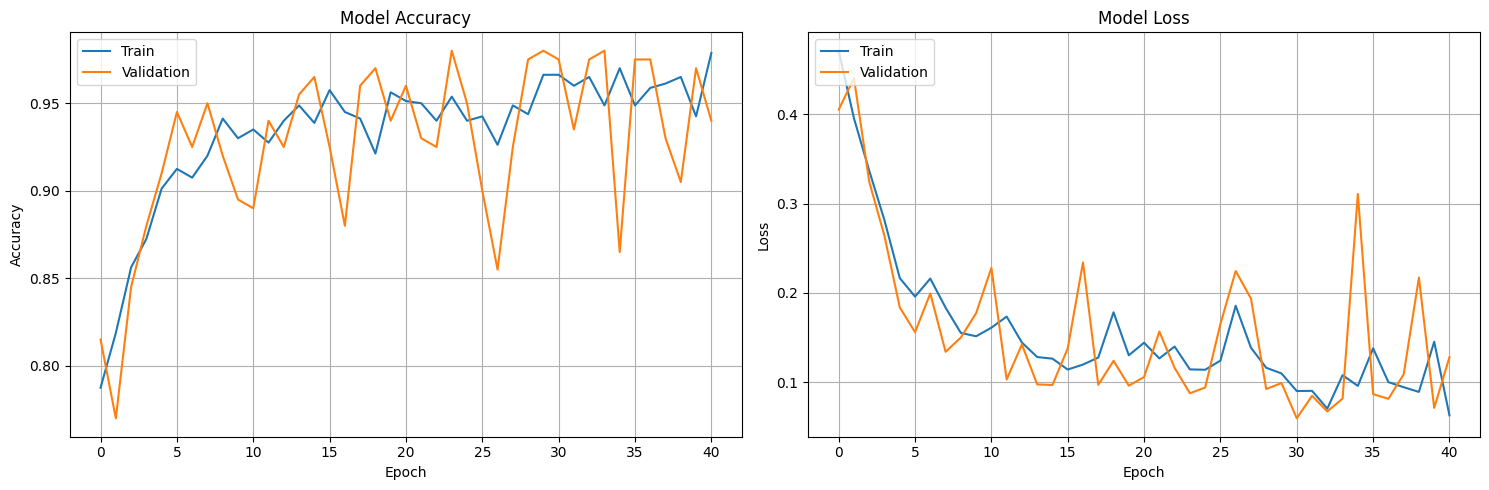

In [74]:
import matplotlib.pyplot as plt

# Assuming you've already trained a model and it's stored in the variable 'out_history'
history = pred_hist

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training & validation accuracy values
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'], loc='upper left')
axs[0].grid(True)

# Plot training & validation loss values
axs[1].plot(history.history['loss'])
axs[1].plot(history.history['val_loss'])
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(['Train', 'Validation'], loc='upper left')
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [76]:
sample = X_test[0]
true_label = y_test[0]

predicted_prob = model.predict(np.array([sample]))[0]

if predicted_prob > 0.5:
    print("Predicted: Potential network issue detected!")
else:
    print("Predicted: Network seems stable!")

if true_label == 1:
    print("Actual: Potential network issue detected!")
else:
    print("Actual: Network seems stable!")


1/1 [==============================] - 0s 31ms/step
Predicted: Network seems stable!
Actual: Network seems stable!


# Expense & Usage Forecaster:
### Hypothetical Dataset: `rakuten_telecom_expense.csv`

1. **monthly_data_usage (in GB)**
    - Description: Represents the total data consumed by a specific user in a month.
    - Range: 0-50 GB
    - Interpretation: Higher data usage generally leads to higher monthly telecom expenses. Specific apps/services might use more data than others.

2. **number_of_calls**
    - Description: Total number of calls made by the user in the month.
    - Range: 0-300
    - Interpretation: A higher number of calls can increase monthly expenses. 

3. **call_duration (in hours)**
    - Description: Total hours spent on calls by the user in the month.
    - Range: 0-100 hours
    - Interpretation: Longer call durations can contribute to higher monthly expenses, especially if not on unlimited plans.

4. **rakuten_fashion_usage (in hours)**
    - Description: Time spent by the user on the Rakuten Fashion app.
    - Range: 0-50 hours
    - Interpretation: More time on the app might lead to more data consumption, directly impacting the monthly expense. Also provides insight into user preferences.

5. **rakuten_recipe_usage (in hours)**
    - Description: Time spent by the user on the Rakuten Recipe app.
    - Range: 0-50 hours
    - Interpretation: As with Rakuten Fashion, more time on this app indicates higher data usage and consequently higher monthly expenses.

6. **streaming_quality_preference (480p, 720p, 1080p, 4K)**
    - Description: The user's preferred streaming quality setting for video apps/services.
    - Interpretation: Higher streaming quality like 1080p or 4K consumes more data than 480p, leading to higher expenses if the user is on a limited data plan.

7. **monthly_expense (in USD)**
    - Description: The target variable, representing the user's total expense for the month on Rakuten Mobile services.
    - Range: 5-200 USD
    - Interpretation: A composite of all the usage factors along with the user's subscription plan.

### Data Assumptions:

- Monthly Data Usage: The relationship between data usage and monthly expenses might be nonlinear. For example, users on unlimited data plans might not see an increase in expenses after a certain threshold.
  
- Rakuten App Usages: Using Rakuten apps might come with certain benefits, like data-saving modes or discounts on data usage.

- Call Expenses: Not all calls might be charged the same. International calls or calls to other networks might have different tariffs.

- Streaming Quality: Users might have set their preferred streaming quality, but actual consumption can vary. For example, they might be watching at 480p even if they've set a preference for 1080p, depending on their network connection or device capabilities.

- External factors like promotional discounts, loyalty benefits, or additional services not captured in the dataset can also impact the monthly expense.

The dataset is entirely hypothetical. In a real-world scenario, the dataset might contain more features, more complex relationships between variables, and a variety of external influencing factors.

In [77]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 1000

# Generate Hypothetical Data
monthly_data_usage = np.random.uniform(0, 50, n)
number_of_calls = np.random.randint(0, 301, n)
call_duration = np.random.uniform(0, 100, n)
rakuten_fashion_usage = np.random.uniform(0, 50, n)
rakuten_recipe_usage = np.random.uniform(0, 50, n)
streaming_quality_preference = np.random.choice(["480p", "720p", "1080p", "4K"], n)
# Here, the monthly_expense is just a mock calculation, in reality, it might be more complex.
monthly_expense = 5 + (monthly_data_usage * 2) + (number_of_calls * 0.05) + (call_duration * 0.1) 

# Convert to DataFrame
df = pd.DataFrame({
    'monthly_data_usage': monthly_data_usage,
    'number_of_calls': number_of_calls,
    'call_duration': call_duration,
    'rakuten_fashion_usage': rakuten_fashion_usage,
    'rakuten_recipe_usage': rakuten_recipe_usage,
    'streaming_quality_preference': streaming_quality_preference,
    'monthly_expense': monthly_expense
})

# Save to CSV
df.to_csv("rakuten_telecom_expense.csv", index=False)


In [87]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load Data
df = pd.read_csv("rakuten_telecom_expense.csv")

# One-Hot Encoding for streaming_quality_preference
encoder = OneHotEncoder(sparse=False)
encoded_streaming_quality = encoder.fit_transform(df[["streaming_quality_preference"]])
df_encoded = pd.DataFrame(encoded_streaming_quality, columns=encoder.get_feature_names_out(["streaming_quality_preference"]))
df = pd.concat([df.drop(["streaming_quality_preference"], axis=1), df_encoded], axis=1)

# Feature and Target Variables
X = df.drop("monthly_expense", axis=1).values
y = df["monthly_expense"].values

# Scaling Features
scaler_X = MinMaxScaler()
X = scaler_X.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Model
pred_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear activation for regression
])

pred_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
history = pred_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Model Summary
pred_model.summary()
model.save('pred_model.h5')

Epoch 1/100


c:\Users\Asus\anaconda3\envs\Capstone_ml\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


50/50 [==============================] - 1s 11ms/step - loss: 5029.4453 - mae: 64.4451 - val_loss: 4137.6318 - val_mae: 57.7859
Epoch 2/100
50/50 [==============================] - 0s 8ms/step - loss: 2513.0752 - mae: 41.5773 - val_loss: 619.2780 - val_mae: 21.5289
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 676.5361 - mae: 21.8546 - val_loss: 522.5677 - val_mae: 19.7796
Epoch 4/100
50/50 [==============================] - 0s 9ms/step - loss: 591.7725 - mae: 20.6081 - val_loss: 426.9487 - val_mae: 17.7998
Epoch 5/100
50/50 [==============================] - 0s 9ms/step - loss: 443.9663 - mae: 17.5108 - val_loss: 317.0598 - val_mae: 15.2726
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 356.5572 - mae: 15.7948 - val_loss: 205.0331 - val_mae: 12.1860
Epoch 7/100
50/50 [==============================] - 0s 9ms/step - loss: 251.5251 - mae: 12.9768 - val_loss: 110.8506 - val_mae: 8.8476
Epoch 8/100
50/50 [==============================]

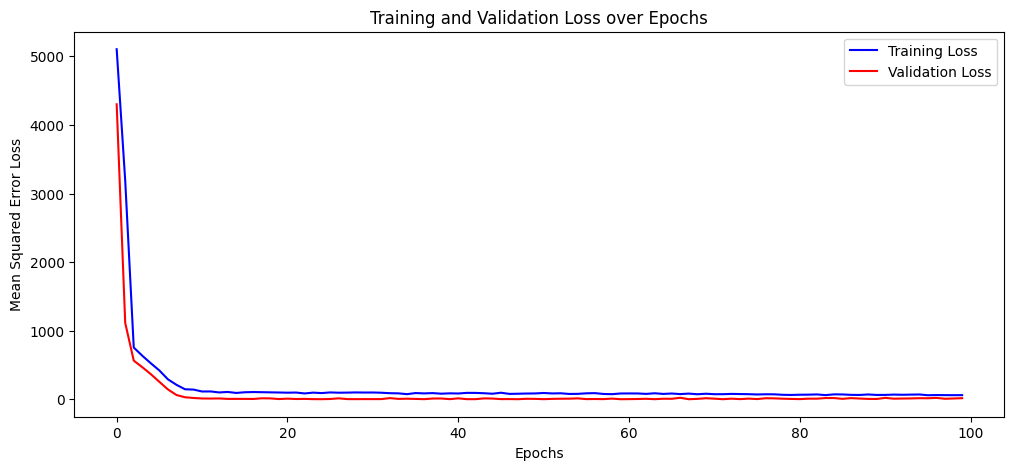

In [79]:
import matplotlib.pyplot as plt

# Extract training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a figure
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()

plt.show()


In [81]:
def predict_and_suggest(data_sample):
    predicted_expense = model.predict(np.array([data_sample]))[0]

    suggestions = []
    if data_sample[3] > 0.8:  
        suggestions.append("Consider reducing your Rakuten Fashion usage to save on data.")
    if data_sample[4] > 0.8: 
        suggestions.append("Limit your Rakuten Recipe usage to cut down on monthly expenses.")

    return predicted_expense, suggestions

# Test
data_sample = X_test[0]
predicted_expense, suggestions = predict_and_suggest(data_sample)

print(f"Predicted Monthly Expense for Next Month: ${predicted_expense[0]:.2f}")
print("\nData-saving Suggestions:")
for s in suggestions:
    print(f"- {s}")


1/1 [==============================] - 0s 26ms/step
Predicted Monthly Expense for Next Month: $51.82

Data-saving Suggestions:


In [95]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Assuming the models are pre-trained and saved
model1 = tf.keras.models.load_model('map_model2.h5')
model2 = tf.keras.models.load_model('outage_model.h5')
model3 = tf.keras.models.load_model('pred_model.h5')
model4 = tf.keras.models.load_model('telecom_model.h5')

def load_and_preprocess_data(csv_path, model_number):
    if model_number == 1:
        df = pd.read_csv('synthetic_telecom_data.csv')
        data_rate = df['data_rate'].values.reshape(-1, 1)
        scaler = MinMaxScaler()
        data_rate = scaler.fit_transform(data_rate)

        WINDOW_SIZE = 10  # an arbitrary number; you can adjust based on your data's seasonality

        X, y = create_sequences(data_rate, WINDOW_SIZE)

    elif model_number == 2:
        # Load the data
        df = pd.read_csv("hypothetical_telecom_data.csv")

        # Using total data usage of the previous month to predict outages or congestion for the next month
        X = df[["total_data_used"]].values[:-1]  # Skip last month

        threshold = df["monthly_expense"].mean()
        y = (df["monthly_expense"].values[1:] > threshold).astype(int)  # Skip first month and binarize based on the threshold

    elif model_number == 3:
        df = pd.read_csv("hypothetical_pred_telecom_data.csv")

        X = df.drop('network_issue', axis=1).values
        y = df['network_issue'].values

    else:
        df = pd.read_csv(csv_path)
        # One-Hot Encoding for streaming_quality_preference
        encoder = OneHotEncoder(sparse=False)
        encoded_streaming_quality = encoder.fit_transform(df[["streaming_quality_preference"]])
        df_encoded = pd.DataFrame(encoded_streaming_quality, columns=encoder.get_feature_names_out(["streaming_quality_preference"]))
        df = pd.concat([df.drop(["streaming_quality_preference"], axis=1), df_encoded], axis=1)

        X = df.drop("monthly_expense", axis=1).values
        y = df["monthly_expense"].values

    # Scaling Features
    scaler_X = MinMaxScaler()

    # Conditionally reshape X for model1 before scaling
    if model_number == 1:
        # Reshape data from 3D to 2D before scaling
        num_samples, num_timesteps, num_features = X.shape
        X = X.reshape(num_samples, num_timesteps * num_features)

    X = scaler_X.fit_transform(X)

    # If it's model1, reshape X back to 3D after scaling
    if model_number == 1:
        X = X.reshape(num_samples, num_timesteps, num_features)

    # Train-Test Split
    X_test, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    return X_test, y_test

def main():
    while True:
        print("\n---- Rakuten Mobile Expense Predictor ----")
        print("1.AI-based network mapping (Data from synthetic_telecom_data.csv) ")
        print("2. AI-Powered Network Maintenance & Outage Predictor (Data from hypothetical_telecom_data.csv)")
        print("3. Predictive Network Maintenance: (Data from hypothetical_pred_telecom_data.csv)")
        print("4. Expense & Usage Forecaster: (Data from rakuten_telecom_expense.csv)")
        print("5. Exit")
        choice = int(input("\nEnter your choice: "))

        if choice == 5:
            print("Exiting the program...")
            break

        csv_map = {
            1: "synthetic_telecom_data.csv",
            2: "hypothetical_telecom_data.csv",
            3: "hypothetical_pred_telecom_data.csv",
            4: "rakuten_telecom_expense.csv"
        }

        if choice in [1, 2, 3, 4]:
            csv_path = csv_map[choice]
            X_test, y_test = load_and_preprocess_data(csv_path, choice)
            model = eval(f"model{choice}")

            # You can add prediction and evaluation logic here based on the loaded data and model

        else:
            print("Invalid choice! Please select a valid option.")

main()



---- Rakuten Mobile Expense Predictor ----
1.AI-based network mapping (Data from synthetic_telecom_data.csv) 
2. AI-Powered Network Maintenance & Outage Predictor (Data from hypothetical_telecom_data.csv)
3. Predictive Network Maintenance: (Data from hypothetical_pred_telecom_data.csv)
4. Expense & Usage Forecaster: (Data from rakuten_telecom_expense.csv)
5. Exit


ValueError: too many values to unpack (expected 2)